# Simple ITK Day 1
## MP- 574
Author: Lawrence Lechuga

In this notebook, we will be exploring Simple ITK and the image class. For some background: ITK, which is implemented in C++, is an open source framework used for image segmentation and registration. In addition, an automated wrapping process allows it to be implemented in Java and Python. 

Simple ITK is a "simplified" version of ITK that is implemented in many languages like C++, R, Python, etc. The primary purpose was intended to increase library accessibity irregardless of programming skillz.

To start, let's explore how to images are loaded in and handled by simple ITK:

### Exercise 1.0:
***Action items:***
1. Import SimpleITK class. The convention is to import as "sitk".
2. Import other classes of importance (i.e. numpy, matplotlib.pyplot, skimage)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import skimage

### Exercise 1.1:
Simple ITK does not handle images as simple numpy nd-arrays. The are handled using the Image class within sitk, where pixels can be represented various enumerated types. Information on the enumerated types can be found at <a href=https://simpleitk.org/doxygen/latest/html/namespaceitk_1_1simple.html#ae40bd64640f4014fba1a8a872ab4df98>SimpleITK's webpage</a>. 
  
***Action items:***
1. Use the help( ) function to see the Image class documentation. i.e. input module.class into the help function. This is a very useful command for any new module that you plan to learn how to use. 
2. In the cell below, I have shown an example shown of how to create an image (initialized with pixels of zero). More specifically, I have initialized an image of size $256 \times 128 \times 64$ with a signed 16-bit integer pixel depth. Using this example create a 2D image, named "img_2d" of size $128 \times 128$ with a 32-bit float pixel depth.
3. Create an RGB image (Red-Green-Blue), named img_rgb of size $128 \times 128$ using the sitk.VectorUint8 type.

In [7]:
#help(sitk.Image)
image = sitk.Image(256,128,64, sitk.sitkInt16)
# Insert your code below:
img_2d = sitk.Image(128,128, sitk.sitkFloat32)
img_rgb = sitk.Image([128,128],sitk.sitkVectorUInt8,3)


### Exercise 1.2:
Now lets practice some basics such as accessing pixel data and assigning values to pixels.
  
***Action Items:***
1. Following the example, print out information on the size, origin, and number of components per pixel for img_2d and img_rgb. (For documentation help, refer to the help command and look under the methods for "Get" commands)
2. I have shown how to print a pixel value using one method. Now, using the GetPixel and SetPixel method, print the (0,0) pixel value for the img_2d and then set it to the value 10.0
3. I have set the 0,0 pixel to the value 10.0. This produces an error! Whats causing this and how to fix it?

In [33]:
print('Image dimensions: ',image.GetDimension())
print('Image Width, Height, and Depth: ', image.GetWidth(),
      image.GetHeight(), image.GetDepth()) # GetSize would be work here too
print('The bit depth and type: ', image.GetPixelIDTypeAsString())

# 1. Insert your code below:

print('Img_2d size: ', img_2d.GetSize())
print('Img_rgb size: ', img_rgb.GetSize())
print('Img_2d origin: ', img_2d.GetOrigin())
print('Img_rgb origin: ', img_rgb.GetOrigin())
print('Img_2d pixel components: ', img_2d.GetNumberOfComponentsPerPixel())
print('Img_rgb pixel components: ', img_rgb.GetNumberOfComponentsPerPixel())

# printing and setting pixels:
print('Image pixel (0,0): ', image[0,0,0])
image[0,0,0] = 10
print('After setting Image pixel (0,0) to 10: ', image[0,0,0])
image[0,0,0] = 0

# 2. Insert your code here:

print('img_2d pixel value at (0,0): ', img_2d.GetPixel(0,0))
img_2d.SetPixel(0,0,10)
print('img_2d pixel value at (0,0): ', img_2d.GetPixel(0,0))

# 3. Uncomment the lines and fix the error below:
# printing and setting pixels:
# print('Image pixel (0,0): ', image[0,0,0])
# image[0,0,0] = 10.0
# print('After setting Image pixel (0,0) to 10: ', image[0,0,0])

Image dimensions:  3
Image Width, Height, and Depth:  256 128 64
The bit depth and type:  16-bit signed integer
Img_2d size:  (128, 128)
Img_rgb size:  (128, 128)
Img_2d origin:  (0.0, 0.0)
Img_rgb origin:  (0.0, 0.0)
Img_2d pixel components:  1
Img_rgb pixel components:  3
Image pixel (0,0):  0
After setting Image pixel (0,0) to 10:  10
img_2d pixel value at (0,0):  10.0
img_2d pixel value at (0,0):  10.0


### Exercise 1.3: 
Sometimes, we want to manipulate the image data in a more matrix-like way. We can actually convert the SimpleITK image into a numpy nd-array. 
  
***Action Items:***
1. Using SimpleITK's GetArrayFromImage(), convert your img_2d to an nd-array called nda
2. Display the image in grayscale using matplotlib.pyplot's imshow() 
3. Create a function that will take a sitk image, create the nda, display, and return the image handle and array
4. Display using the function

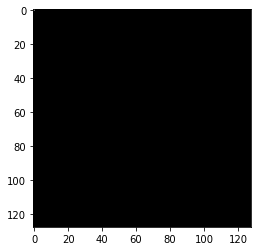

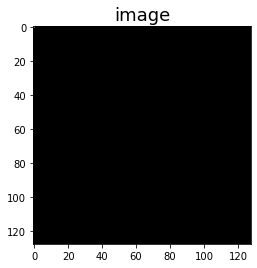

In [53]:
# 1. Insert code here:
nda = sitk.GetArrayFromImage(img_2d)
# 2. Insert code here: 

h = plt.imshow(nda,cmap='gray')
plt.show()
# 3. insert code below:
def sitkshow(Img,title):
    NDA = sitk.GetArrayFromImage(Img)
    H = plt.imshow(NDA,cmap='gray')
    plt.title(title,fontsize = 18)
    plt.show()
    return NDA, H
# 4. insert code below:
nda,h = sitkshow(img_2d,'image')

### Exercise 1.4:
Read in a DICOM image
Display the meta information
Display another image